# Correspondance Analysis - Women Work

In [1]:
import pandas as pd
url = "http://factominer.free.fr/factomethods/datasets/women_work.txt"
women_work = pd.read_table(url,header=0)

In [2]:
# Modèle avec colonnes supplémentaires
from scientisttools.decomposition import CA
my_ca1 = CA(n_components=None,
            row_labels=women_work.index.values,
            col_labels=women_work.columns[:3].values,
            row_sup_labels=None,
            col_sup_labels=women_work.columns[3:].values).fit(women_work)

In [3]:
from scientisttools.ggplot import fviz_ca_col

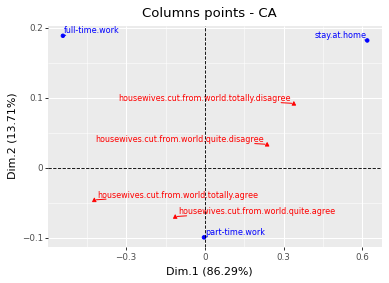

In [4]:
p = fviz_ca_col(self=my_ca1,repel=True)
print(p)

In [5]:
from scientisttools.extractfactor import dimdesc
DimDesc = dimdesc(my_ca1)
DimDesc.keys()

dict_keys(['Dim.1', 'Dim.2'])

In [6]:
DimDesc["Dim.1"]["row"]

,coord
both.man.and.woman.work,-0.558605
man.morks.more,-0.243759
only.man.works,0.309562


In [7]:
DimDesc["Dim.1"]["col"]

,coord
full-time.work,-0.541113
housewives.cut.from.world.totally.agree,-0.421395
housewives.cut.from.world.quite.agree,-0.113230
part-time.work,-0.003638
housewives.cut.from.world.quite.disagree,0.236928
housewives.cut.from.world.totally.disagree,0.338720
stay.at.home,0.618376


In [8]:
DimDesc["Dim.2"]["row"]

,coord
man.morks.more,-0.172207
only.man.works,0.038173
both.man.and.woman.work,0.233387


In [9]:
DimDesc["Dim.2"]["col"]

,coord
part-time.work,-0.099654
housewives.cut.from.world.quite.agree,-0.069851
housewives.cut.from.world.totally.agree,-0.045932
housewives.cut.from.world.quite.disagree,0.033732
housewives.cut.from.world.totally.disagree,0.092381
stay.at.home,0.182662
full-time.work,0.189387


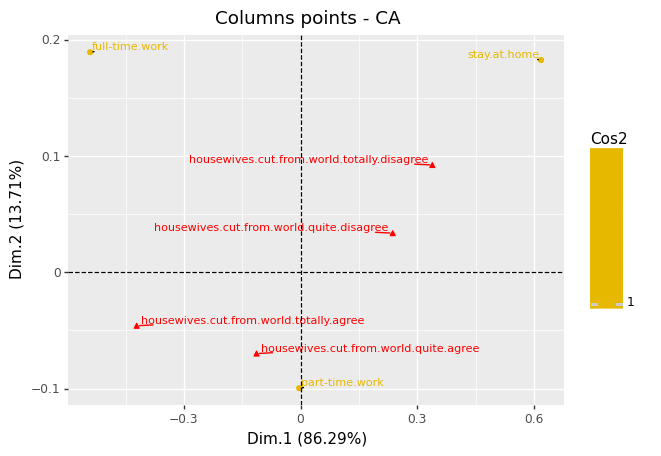

In [10]:
from scientisttools.ggplot import fviz_ca_col
p = fviz_ca_col(my_ca1,color="cos2",repel=True)
print(p)

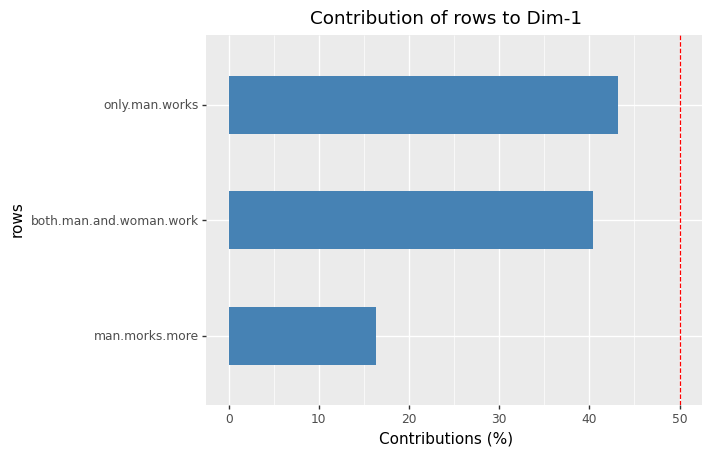

In [11]:
from scientisttools.ggplot import fviz_cosines, fviz_contrib

p = fviz_contrib(my_ca1)
print(p)


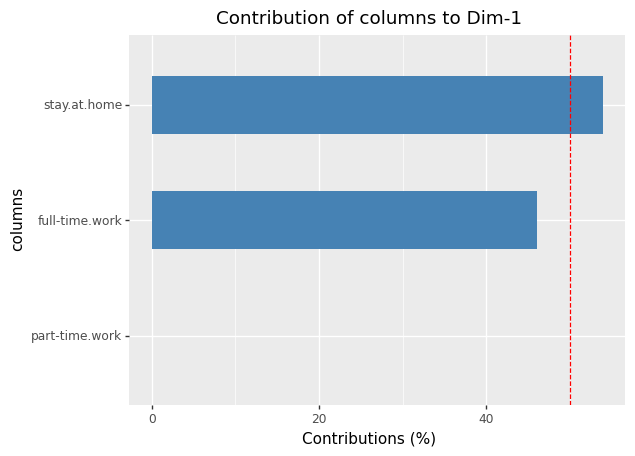

In [12]:
p = fviz_contrib(my_ca1,choice="var")
print(p)

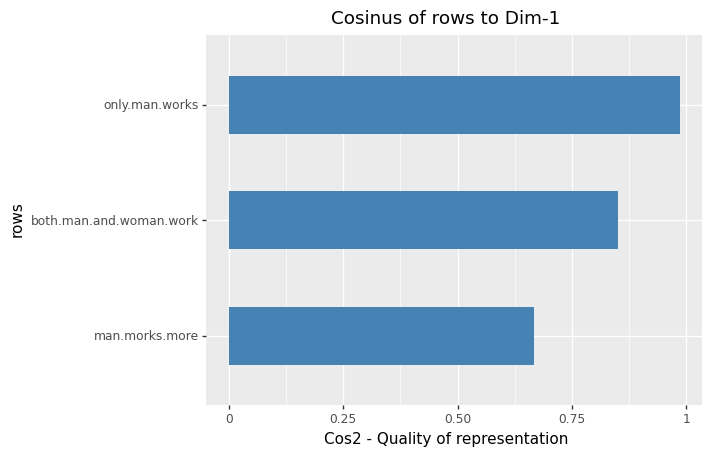

In [13]:
p = fviz_cosines(my_ca1,choice="ind")
print(p)

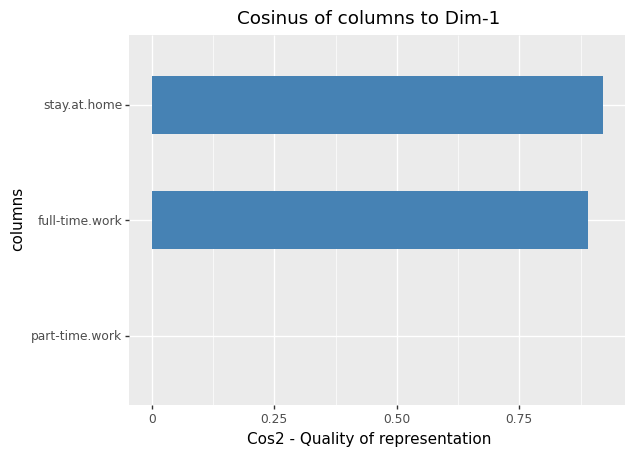

In [14]:
p = fviz_cosines(my_ca1,choice="var")
print(p)

In [15]:
D = women_work[women_work.columns[:3]]
D

,stay.at.home,part-time.work,full-time.work
both.man.and.woman.work,13,142,106
man.morks.more,30,408,117
only.man.works,241,573,94


In [16]:
df = D.sum(axis=1).to_frame(name="Total").reset_index().rename(columns={"index":"Modalites"})

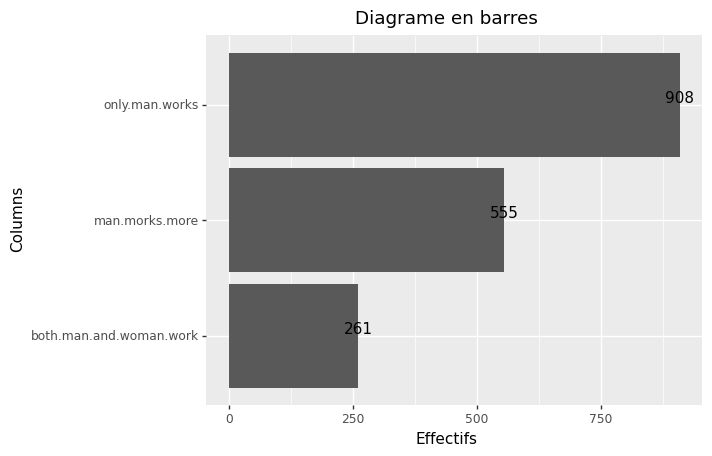

In [17]:
from plotnine import *

p = (
    ggplot(df,aes(x="reorder(Modalites,Total)",y="Total",label="Total",group = 1))+geom_bar(stat="identity")+
    geom_text(va="bottom",ha="center")+
    labs(x="Columns",y="Effectifs",title="Diagrame en barres")+
    coord_flip()
)
print(p)